In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
from datetime import datetime

from datacube import Datacube
import matplotlib.pyplot as plt

sys.path.append("../scripts")
from dea_plotting import map_shapefile
from dea_spatialtools import xr_rasterize

/env/lib/python3.6/site-packages/geopandas/_compat.py:110: UserWarning: The Shapely GEOS version (3.7.2-CAPI-1.11.0 ) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
dc = Datacube(app="Sorting_out_polygons")

/env/lib/python3.6/site-packages/datacube/drivers/postgres/_connections.py:87: SADeprecationWarning: Calling URL() directly is deprecated and will be disabled in a future release.  The public constructor for URL is now the URL.create() method.
  username=username, password=password,


In [3]:
linescan_datasets = dc.find_datasets(product='linescan')
linescan_datasets = sorted(linescan_datasets, key = lambda ds: (ds.center_time, ds.id))

sample = linescan_datasets[0]

print(sample)
print(sample.metadata_doc['label'])

print(f'\nNumber of linescan datasets: {len(linescan_datasets)}')

Dataset <id=5526d747-c6b7-50b8-b0b5-905ca28264ee product=linescan location=https://geoau.blob.core.windows.net/ey-gsa/linescan/ROSEDALE_P1_201901041439_MGA94_55.odc-dataset.json>
ROSEDALE_P1_201901041439_MGA94_55

Number of linescan datasets: 134


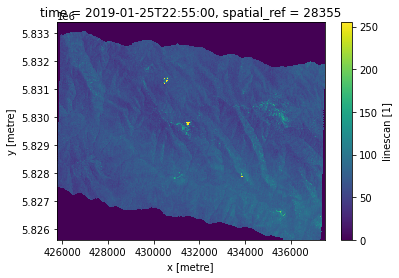

In [4]:
ds = dc.load(product='linescan', id=linescan_datasets[23].id, output_crs='epsg:28355', resolution=(-10,10))
ds.linescan.plot()

In [5]:
train = pd.read_csv('resources/challenge1_train.csv', index_col='id')
print(train.head())
print(f'\nNumber of training images: {len(train)}')

                                  label     dateTimeLocal       dateTimeUTC
id                                                                         
0     ROSEDALE_P1_201901041439_MGA94_55   4/01/2019 14:39    4/01/2019 3:39
1   ROSEDALE_1_P1_201901041446_MGA94_55   4/01/2019 14:46    4/01/2019 3:46
2   ROSEDALE_3_P1_201901041501_MGA94_55   4/01/2019 15:01    4/01/2019 4:01
3   POINT_H_62_P1_201901162128_MGA94_55  16/01/2019 21:28  16/01/2019 10:28
4   NUNNETT_73_P1_201901171134_MGA94_55  17/01/2019 11:34   17/01/2019 0:34

Number of training images: 129


In [6]:
vector_file = 'resources/fire_boundaries.shp'
gdf = gpd.read_file(vector_file)
print('Number of objects in geodataframe: ' + str(len(gdf)))
gdf.head().T

Number of objects in geodataframe: 976


,0,1,2,3,4
Source,Linescan,Linescan,Linescan,Linescan,Linescan
SourceName,aberfeldy west 200 p1_201901260955_mga94_55.jpg,aberfeldy west 200 p1_201901260955_mga94_55.jpg,aberfeldy west 200 p1_201901260955_mga94_55.jpg,aberfeldy west 214 p1_201901261750_mga94_55.jpg,aberfeldy west 214 p1_201901261750_mga94_55.jpg
Type,Initial ignition,Initial ignition,Initial ignition,Spot,Main run
dtString,2019/01/26 09:55:00.000,2019/01/26 09:55:00.000,2019/01/26 09:55:00.000,2019/01/26 17:50:00.000,2019/01/26 17:50:00.000
Comments,originally Latrobe 87 - Jericho - Jim Track,originally Latrobe 86 - Jericho - Thomson - Jo...,originally Latrobe 85 - Jericho - Cream Can Hill,originally Latrobe 87 - Jericho - Jim Track,originally Latrobe 87 - Jericho - Jim Track
dtUTC,2019-01-25 22:55:00,2019-01-25 22:55:00,2019-01-25 22:55:00,2019-01-26 06:50:00,2019-01-26 06:50:00
dtLocal,2019-01-26 09:55:00,2019-01-26 09:55:00,2019-01-26 09:55:00,2019-01-26 17:50:00,2019-01-26 17:50:00
ID,0,1,2,3,4
event,Latrobe86,Latrobe86,Latrobe86,Latrobe86,Latrobe86
geometry,"POLYGON ((431455.6047864075 5829806.836519156,...","POLYGON ((433874.4491466696 5827986.798174933,...","POLYGON ((430459.9135101112 5831285.491971598,...","POLYGON ((431937.3755649604 5829943.370969374,...","POLYGON ((431541.6507835893 5829804.025387563,..."


In [7]:
print(linescan_datasets[23].metadata_doc['label'])
print(gdf.SourceName[0])

ABERFELDY_WEST_200_P1_201901260955_MGA94_55
aberfeldy west 200 p1_201901260955_mga94_55.jpg


In [8]:
composites = gdf[gdf.SourceName.str.upper().str.contains(",|&|(COMPOSITE)", na=False)]

print(f"Total composite polygons: {len(composites)}")
composites.SourceName.head()

Total composite polygons: 285


/env/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


240    Composite wallhalla 397,398 & 401 20190225 (13...
241    Composite wallhalla 397,398 & 401 20190225 (13...
242    Composite wallhalla 397,398 & 401 20190225 (13...
315    macalister 681 & 682, (684 & 685 minor) compos...
316    macalister 681 & 682, (684 & 685 minor) compos...
Name: SourceName, dtype: object

In [9]:
def clean_name(name):
    if name is None:
        res = None
    else:
        if name.upper()[-4::] == ".JPG":
            res = name.upper()[:-4].replace(' ','_')
        else:
            res = name.upper().replace(' ','_')
    return res

test_string = 'aberfeldy west 200 p1_201901260955_mga94_55.jpg'
test_string_composite = 'Composite wallhalla 397,398 & 401 20190225 (1311 to 1342hrs)'


In [10]:
gdf['SourceNameClean'] = gdf.apply(lambda row: clean_name(row.SourceName), axis=1)
gdf.dtUTC = gdf.apply(lambda row: datetime.strptime(row.dtUTC, '%Y-%m-%d %H:%M:%S'), axis=1)
gdf.dtLocal = gdf.apply(lambda row: datetime.strptime(row.dtLocal, '%Y-%m-%d %H:%M:%S'), axis=1)
gdf.head().T

,0,1,2,3,4
Source,Linescan,Linescan,Linescan,Linescan,Linescan
SourceName,aberfeldy west 200 p1_201901260955_mga94_55.jpg,aberfeldy west 200 p1_201901260955_mga94_55.jpg,aberfeldy west 200 p1_201901260955_mga94_55.jpg,aberfeldy west 214 p1_201901261750_mga94_55.jpg,aberfeldy west 214 p1_201901261750_mga94_55.jpg
Type,Initial ignition,Initial ignition,Initial ignition,Spot,Main run
dtString,2019/01/26 09:55:00.000,2019/01/26 09:55:00.000,2019/01/26 09:55:00.000,2019/01/26 17:50:00.000,2019/01/26 17:50:00.000
Comments,originally Latrobe 87 - Jericho - Jim Track,originally Latrobe 86 - Jericho - Thomson - Jo...,originally Latrobe 85 - Jericho - Cream Can Hill,originally Latrobe 87 - Jericho - Jim Track,originally Latrobe 87 - Jericho - Jim Track
dtUTC,2019-01-25 22:55:00,2019-01-25 22:55:00,2019-01-25 22:55:00,2019-01-26 06:50:00,2019-01-26 06:50:00
dtLocal,2019-01-26 09:55:00,2019-01-26 09:55:00,2019-01-26 09:55:00,2019-01-26 17:50:00,2019-01-26 17:50:00
ID,0,1,2,3,4
event,Latrobe86,Latrobe86,Latrobe86,Latrobe86,Latrobe86
geometry,"POLYGON ((431455.6047864075 5829806.836519156,...","POLYGON ((433874.4491466696 5827986.798174933,...","POLYGON ((430459.9135101112 5831285.491971598,...","POLYGON ((431937.3755649604 5829943.370969374,...","POLYGON ((431541.6507835893 5829804.025387563,..."


In [11]:
id_with_poly = []

for i in range(len(linescan_datasets)):
    fname = linescan_datasets[i].metadata_doc['label']
    count = sum(gdf.SourceNameClean == fname)
    if count > 0:
        print(f"There are {count} polygons for linescan {fname}")
        id_with_poly.append(i)
        print(i)


There are 3 polygons for linescan ABERFELDY_WEST_200_P1_201901260955_MGA94_55
23
There are 17 polygons for linescan ABERFELDY_WEST_214_P1_201901261750_MGA94_55
26
There are 21 polygons for linescan CREAM_JIM_JORDAN_217_P1_201901262218_MGA94_55
27
There are 12 polygons for linescan JORDAN_231_P1_201901271500_MGA94_55
29
There are 11 polygons for linescan JORDAN_234_P1_201901271901_MGA94_55
31
There are 30 polygons for linescan JORDAN_264_P1_201901301524_MGA94_55
33
There are 21 polygons for linescan MCCALLISTER79_LA_TROBE_97_266_P1_201901301552_MGA94_55
34
There are 15 polygons for linescan LA_TROBE_97_MCCALLISTER_79_268_P1_201901301611_MGA94_55
35
There are 5 polygons for linescan WALHALLA_295_P1_201902011156_MGA94_55
38
There are 21 polygons for linescan JORDAN_310_P1_201902012046_MGA94_55
39
There are 4 polygons for linescan WALHALLA_339_P1_201902030520_MGA94_55
41
There are 1 polygons for linescan WALHALLA_378_P1_201902041304_MGA94_55
50
There are 23 polygons for linescan MACALISTER

In [12]:
#list of sources
srcs_linescans = []

#list of their masks
targets_array = []

for i in range(len(id_with_poly)):
    fname = linescan_datasets[id_with_poly[i]].metadata_doc['label']
    ob = gdf.loc[gdf.SourceNameClean == fname]
    src = dc.load(product='linescan', id=linescan_datasets[id_with_poly[i]].id, output_crs='epsg:28355', resolution=(-10,10))
    tgt = xr_rasterize(gdf=ob, da=src)

    #fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    #src.linescan.plot(ax=ax[0])
    #ax[0].set_title('Source: linescan')

    #tgt.plot(ax=ax[1])
    #ax[1].set_title('Target: ground truth mask')

    srcs_linescans.append(src.linescan)
    targets_array.append(tgt)


print(srcs_linescans)
print(targets_array)


Rasterizing to match xarray.DataArray dimensions (777, 1171)
Rasterizing to match xarray.DataArray dimensions (1297, 3333)
Rasterizing to match xarray.DataArray dimensions (1873, 2125)
Rasterizing to match xarray.DataArray dimensions (2052, 2196)
Rasterizing to match xarray.DataArray dimensions (2022, 2435)
Rasterizing to match xarray.DataArray dimensions (2295, 1799)
Rasterizing to match xarray.DataArray dimensions (1908, 2142)
Rasterizing to match xarray.DataArray dimensions (1963, 2224)
Rasterizing to match xarray.DataArray dimensions (1753, 1934)
Rasterizing to match xarray.DataArray dimensions (3314, 1683)
Rasterizing to match xarray.DataArray dimensions (2440, 2132)
Rasterizing to match xarray.DataArray dimensions (2847, 2720)
Rasterizing to match xarray.DataArray dimensions (3509, 3770)
Rasterizing to match xarray.DataArray dimensions (3981, 2973)
Rasterizing to match xarray.DataArray dimensions (3736, 3548)
Rasterizing to match xarray.DataArray dimensions (4124, 3915)
Rasterizi

[<xarray.DataArray (y: 777, x: 1171)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
Coordinates:
  * y        (y) float64 5.833e+06 5.833e+06 5.833e+06 ... 5.826e+06 5.826e+06
  * x        (x) float64 4.258e+05 4.258e+05 4.258e+05 ... 4.375e+05 4.375e+05
Attributes:
    crs:           epsg:28355
    grid_mapping:  spatial_ref, <xarray.DataArray (y: 1297, x: 3333)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
Coordinates:
  * y        (y) float64 5.835e+06 5.835e+06 5.835e+06 ... 5.822e+06 5.822e+06
  * x        (x) float64 4.149e+05 4.149e+05 4.149e+05 ... 4.482e+05 4.482e+05
Attributes:
    crs:           epsg:28355
    grid_mapping:  spatial_ref

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


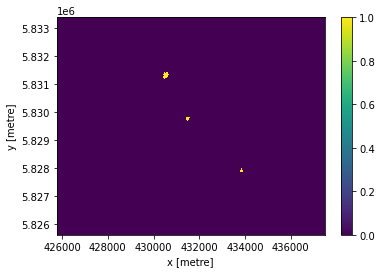

In [13]:
print(targets_array[0].plot())
print(targets_array[0].values)

In [14]:
# Convert the data into images
from PIL import Image

first_map = targets_array[0].values
print(first_map)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [16]:
#location = /home/jovyan/03_EY_challenge1/Test Image
#location = /home/jovyan/03_EY_challenge1/Answer Image


# Convert the data into images
from PIL import Image

import os
os.chdir('/home/jovyan/03_EY_challenge1/Test Image')
#linescan pics
for i in range(len(srcs_linescans)):
    first_map = srcs_linescans[i].values[0]
    img = Image.fromarray(first_map)
    img.save(str(i) + 'srcs' + '.png')

os.chdir('/home/jovyan/03_EY_challenge1/Answer Image')
#linescan pics
for i in range(len(targets_array)):
    first_map = targets_array[i].values * 255
    img = Image.fromarray(first_map)
    img.save(str(i) + 'tgt' +'.png')






In [17]:
centre_value = srcs_linescans[0].sel(x = 430500, y = 5.83 * 1e6, method='nearest').values[0]
print(centre_value)

59


In [18]:
#https://github.com/tensorflow/examples/blob/master/LICENSE
!pip install git+https://github.com/tensorflow/examples

  Cloning https://github.com/tensorflow/examples to /tmp/pip-req-build-_fd9hoe1
  Created wheel for tensorflow-examples: filename=tensorflow_examples-1ec543bc44ea3b3c320d3f276c8b1f8baa55a02c_-py3-none-any.whl size=265870 sha256=7825e9baf0210e8f11153363af6523762917fc0f141d5e27debcd2ca2084c69c
  Stored in directory: /tmp/pip-ephem-wheel-cache-kf4rj92h/wheels/68/b9/3e/6b0ee5c54e76b3a3ec0a564b7a7dd84e263d37c174bcd9c1f9
Successfully built tensorflow-examples
You should consider upgrading via the '/env/bin/python3 -m pip install --upgrade pip' command.


In [19]:
#import
#https://www.tensorflow.org/tutorials/images/segmentation
import tensorflow as tf

from tensorflow_examples.models.pix2pix import pix2pix

from IPython.display import clear_output
import matplotlib.pyplot as plt

In [24]:
os.chdir('/home/jovyan/03_EY_challenge1/Test Image')
!tar chvfz notebook.tar.gz *

0srcs.png
10srcs.png
11srcs.png
12srcs.png
13srcs.png
14srcs.png
15srcs.png
16srcs.png
17srcs.png
18srcs.png
19srcs.png
1srcs.png
20srcs.png
21srcs.png
22srcs.png
23srcs.png
24srcs.png
25srcs.png
26srcs.png
27srcs.png
28srcs.png
29srcs.png
2srcs.png
30srcs.png
31srcs.png
32srcs.png
33srcs.png
34srcs.png
35srcs.png
36srcs.png
3srcs.png
4srcs.png
5srcs.png
6srcs.png
7srcs.png
8srcs.png
9srcs.png
